# 머신러닝으로 2021시즌 MLB 타자들의 홈런갯수 예측해보기

1. EDA & Feature Engineering
2. Modeling & Prediction

---
### 칼럼
- 'last_name'
- 'first_name'
- 'player_id'
- 'year'
- 'b_ab'
- 'b_total_pa'
- 'b_home_run'
- 'batting_avg'
- 'slg_percent'
- 'on_base_percent',
- 'on_base_plus_slg'
- 'xba'
- 'xslg'
- 'woba'
- 'xwoba'
- 'xobp'
- 'xiso'
- 'wobacon'
- 'xwobacon'
- 'bacon'
- 'xbacon'
- 'xbadiff'
- 'xslgdiff',
- 'wobadif'
- 'exit_velocity_avg'
- 'launch_angle_avg',
- 'sweet_spot_percent'
- 'barrels'
- 'barrel_batted_rate',
- 'poorlyweak_percent'
- 'hard_hit_percent'
- 'z_swing_percent',
- 'z_swing_miss_percent'
- 'oz_swing_miss_percent'
- 'oz_contact_percent',
- 'groundballs_percent'
- 'flyballs_percent'
- 'linedrives_percent',
---

## EDA & Feature Engineering
- Train Dataset : 2015년 ~ 2020년 타자들의 성적 및 홈런갯수
- Test Dataset : 2021년(7월 21일기준) 타자들의 성적 및 홈런갯수 (출전게임 수 포함 / Prediction 시 홈런 칼럼 삭제)

In [11]:
import pandas as pd

df_old = pd.read_csv('2015_2020.csv')
df_now = pd.read_csv('2021.csv')

In [2]:
# 2015 ~ 2020 데이터 살펴보기
df_old.head()

,last_name,first_name,player_id,year,b_ab,b_total_pa,b_home_run,batting_avg,slg_percent,on_base_percent,...,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_miss_percent,oz_contact_percent,groundballs_percent,flyballs_percent,linedrives_percent,Unnamed: 38
0,Cabrera,Miguel,408234,2020,204,231,10,0.250,0.417,0.329,...,1.3,49.7,70.5,18.4,55.9,44.1,42.6,16.8,35.5,NaN
1,Cruz Jr.,Nelson,443558,2020,185,214,16,0.303,0.595,0.397,...,3.1,47.2,68.3,22.0,56.3,43.8,47.2,16.5,30.7,NaN
2,Peralta,David,444482,2020,203,218,5,0.300,0.433,0.339,...,1.3,36.3,65.5,15.5,35.8,64.2,51.2,16.9,27.5,NaN
3,Longoria,Evan,446334,2020,193,209,7,0.254,0.425,0.297,...,3.2,45.2,62.4,12.2,40.5,59.5,50.3,23.6,23.6,NaN
4,Cabrera,Asdrubal,452678,2020,190,213,8,0.242,0.447,0.305,...,1.9,38.3,66.8,12.3,36.9,62.3,45.5,19.5,26.6,NaN


In [3]:
df_now.head()

,last_name,first_name,player_id,year,b_ab,b_total_pa,b_home_run,batting_avg,slg_percent,on_base_percent,...,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_miss_percent,oz_contact_percent,groundballs_percent,flyballs_percent,linedrives_percent,Unnamed: 39
0,Cabrera,Miguel,408234,2021,268,292,7,0.243,0.347,0.298,...,3.1,48.5,68.2,20.9,41.8,58.2,50.0,24.2,21.6,NaN
1,Cruz Jr.,Nelson,443558,2021,288,336,19,0.299,0.545,0.372,...,3.4,54.0,73.9,21.1,46.2,53.8,45.5,26.0,21.3,NaN
2,Peralta,David,444482,2021,311,345,4,0.254,0.399,0.328,...,3.9,41.1,65.7,13.7,41.0,58.4,53.5,14.7,24.8,NaN
3,Blackmon,Charlie,453568,2021,291,336,5,0.261,0.364,0.357,...,6.0,40.9,67.0,13.1,31.2,68.1,51.2,22.2,21.8,NaN
4,McCutchen,Andrew,457705,2021,288,353,16,0.229,0.441,0.351,...,4.1,38.2,62.4,19.4,47.8,51.5,45.2,28.1,20.7,NaN


In [4]:
print(df_old.shape)
print(df_now.shape)

(850, 39)
(137, 40)


In [5]:
df_old.describe()

,player_id,year,b_ab,b_total_pa,b_home_run,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,xba,...,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_miss_percent,oz_contact_percent,groundballs_percent,flyballs_percent,linedrives_percent,Unnamed: 38
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,...,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,0.0
mean,532467.815294,2017.478824,484.424706,542.834118,19.751765,0.269154,0.456747,0.339328,0.796065,0.258485,...,3.285059,37.854471,67.362235,15.931412,38.478235,61.069882,43.831765,22.639882,26.575294,NaN
std,84431.889886,1.708469,137.434493,153.269187,10.664971,0.029226,0.067431,0.034835,0.093873,0.023549,...,1.551177,7.618133,5.987985,5.326779,9.234247,9.129303,6.732918,5.030910,3.478350,NaN
min,116338.000000,2015.000000,154.000000,186.000000,1.000000,0.168000,0.266000,0.238000,0.539000,0.186000,...,0.400000,8.500000,47.600000,3.600000,16.500000,29.500000,25.400000,8.500000,15.200000,NaN
25%,462101.000000,2016.000000,470.000000,523.000000,11.000000,0.250000,0.411000,0.315000,0.732000,0.243000,...,2.100000,33.500000,63.600000,11.900000,31.900000,55.225000,38.825000,19.125000,24.200000,NaN
50%,543333.000000,2017.000000,525.000000,587.500000,19.000000,0.268500,0.450500,0.337500,0.789500,0.258000,...,3.100000,38.400000,67.400000,15.700000,38.400000,61.300000,43.600000,22.600000,26.300000,NaN
75%,595879.000000,2019.000000,575.000000,648.000000,27.000000,0.289000,0.501750,0.360000,0.850000,0.274000,...,4.100000,42.900000,71.400000,19.275000,44.200000,67.500000,48.400000,26.100000,28.600000,NaN
max,673357.000000,2020.000000,681.000000,747.000000,59.000000,0.364000,0.695000,0.490000,1.185000,0.338000,...,12.400000,62.200000,84.100000,35.600000,70.500000,83.100000,63.700000,37.900000,40.400000,NaN


In [6]:
df_now.describe()

,player_id,year,b_ab,b_total_pa,b_home_run,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,b_game,...,poorlyweak_percent,hard_hit_percent,z_swing_percent,z_swing_miss_percent,oz_swing_miss_percent,oz_contact_percent,groundballs_percent,flyballs_percent,linedrives_percent,Unnamed: 39
count,137.000000,137.0,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,0.0
mean,595719.262774,2021.0,310.941606,350.233577,13.284672,0.262781,0.450839,0.336781,0.787628,85.240876,...,3.758394,42.387591,68.420438,17.716788,41.940876,57.811679,43.043796,26.451825,24.099270,NaN
std,64329.176044,0.0,29.072113,31.006940,6.347706,0.028865,0.073066,0.034879,0.097520,5.754187,...,1.644181,7.224147,5.577623,5.396521,9.116280,9.090267,6.852542,5.568796,3.470495,NaN
min,408234.000000,2021.0,242.000000,291.000000,2.000000,0.170000,0.271000,0.249000,0.520000,70.000000,...,0.500000,17.900000,57.400000,6.300000,18.700000,32.500000,27.000000,13.100000,16.900000,NaN
25%,547180.000000,2021.0,288.000000,328.000000,8.000000,0.246000,0.399000,0.313000,0.724000,82.000000,...,2.600000,38.200000,64.500000,14.300000,36.600000,51.200000,38.500000,22.800000,21.400000,NaN
50%,605141.000000,2021.0,311.000000,352.000000,14.000000,0.262000,0.449000,0.337000,0.784000,86.000000,...,3.400000,42.600000,67.000000,17.700000,41.800000,57.900000,42.100000,26.100000,23.900000,NaN
75%,656775.000000,2021.0,334.000000,376.000000,17.000000,0.277000,0.492000,0.360000,0.835000,90.000000,...,4.800000,46.500000,72.500000,21.200000,48.400000,63.400000,47.900000,30.300000,26.100000,NaN
max,670541.000000,2021.0,375.000000,410.000000,34.000000,0.329000,0.686000,0.427000,1.095000,94.000000,...,9.400000,58.300000,83.300000,32.200000,67.500000,81.300000,67.900000,40.500000,34.700000,NaN


In [7]:
df_old.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'b_ab', 'b_total_pa',
       'b_home_run', 'batting_avg', 'slg_percent', 'on_base_percent',
       'on_base_plus_slg', 'xba', 'xslg', 'woba', 'xwoba', 'xobp', 'xiso',
       'wobacon', 'xwobacon', 'bacon', 'xbacon', 'xbadiff', 'xslgdiff',
       'wobadif', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrels', 'barrel_batted_rate',
       'poorlyweak_percent', 'hard_hit_percent', 'z_swing_percent',
       'z_swing_miss_percent', 'oz_swing_miss_percent', 'oz_contact_percent',
       'groundballs_percent', 'flyballs_percent', 'linedrives_percent',
       'Unnamed: 38'],
      dtype='object')

In [8]:
df_now.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'b_ab', 'b_total_pa',
       'b_home_run', 'batting_avg', 'slg_percent', 'on_base_percent',
       'on_base_plus_slg', 'b_game', 'xba', 'xslg', 'woba', 'xwoba', 'xobp',
       'xiso', 'wobacon', 'xwobacon', 'bacon', 'xbacon', 'xbadiff', 'xslgdiff',
       'wobadif', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrels', 'barrel_batted_rate',
       'poorlyweak_percent', 'hard_hit_percent', 'z_swing_percent',
       'z_swing_miss_percent', 'oz_swing_miss_percent', 'oz_contact_percent',
       'groundballs_percent', 'flyballs_percent', 'linedrives_percent',
       'Unnamed: 39'],
      dtype='object')

### 필요없는 칼럼 삭제
- 선수이름, Unnamed:(?) 칼럼 삭제
- 2020년 데이터 삭제 (단축시즌이었기 때문에)
- 연도표시 칼럼 삭제
- 2021년 데이터의 player_id, 이름은 따로 저장 (예측때 사용)

In [12]:
# 선수이름, Unamed 칼럼 삭제
df_old = df_old.drop(['last_name', ' first_name', 'Unnamed: 38'], axis=1)
player_id = df_now['player_id']
name = df_now['last_name'] + df_now[' first_name']
df_now = df_now.drop(['last_name', ' first_name', 'Unnamed: 39'], axis=1)

# 2020년 데이터 삭제
df_old = df_old[df_old.year != 2020]

# 연도 칼럼 삭제
df_old = df_old.drop(['year'], axis=1)
df_now = df_now.drop(['year'], axis=1)

print(df_old.shape)
print(df_now.columns)

(708, 35)
Index(['player_id', 'b_ab', 'b_total_pa', 'b_home_run', 'batting_avg',
       'slg_percent', 'on_base_percent', 'on_base_plus_slg', 'b_game', 'xba',
       'xslg', 'woba', 'xwoba', 'xobp', 'xiso', 'wobacon', 'xwobacon', 'bacon',
       'xbacon', 'xbadiff', 'xslgdiff', 'wobadif', 'exit_velocity_avg',
       'launch_angle_avg', 'sweet_spot_percent', 'barrels',
       'barrel_batted_rate', 'poorlyweak_percent', 'hard_hit_percent',
       'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_miss_percent',
       'oz_contact_percent', 'groundballs_percent', 'flyballs_percent',
       'linedrives_percent'],
      dtype='object')


### target (홈런개수) 살펴보기
- 그래프를 통해 편향성 알아보기
- 양의 왜도값을 가짐
- log변환을 통해 정규성을 띄도록 변환한 값 확인

/home/minding/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='b_home_run', ylabel='Density'>

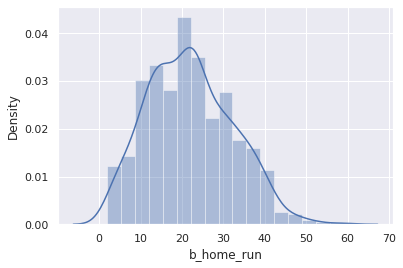

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

sns.distplot(df_old['b_home_run'])

/home/minding/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='b_home_run', ylabel='Density'>

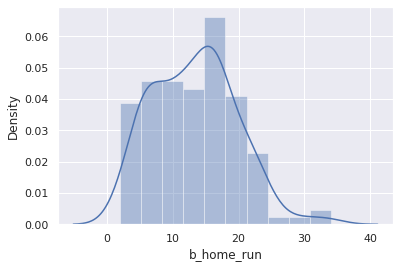

In [14]:
# test set의 왜도값 분석 (삭제될 칼럼 - 얼추 비슷한 모양 보임)
sns.distplot(df_now['b_home_run'])

### 상관관계 분석

In [15]:
corr = df_old.corr()
corr_columns = corr.index[abs(corr['b_home_run']) >= 0.4]
corr_columns

Index(['b_home_run', 'slg_percent', 'on_base_plus_slg', 'xslg', 'woba',
       'xwoba', 'xobp', 'xiso', 'wobacon', 'xwobacon', 'xbacon',
       'exit_velocity_avg', 'launch_angle_avg', 'barrels',
       'barrel_batted_rate', 'hard_hit_percent', 'z_swing_miss_percent',
       'groundballs_percent', 'flyballs_percent'],
      dtype='object')

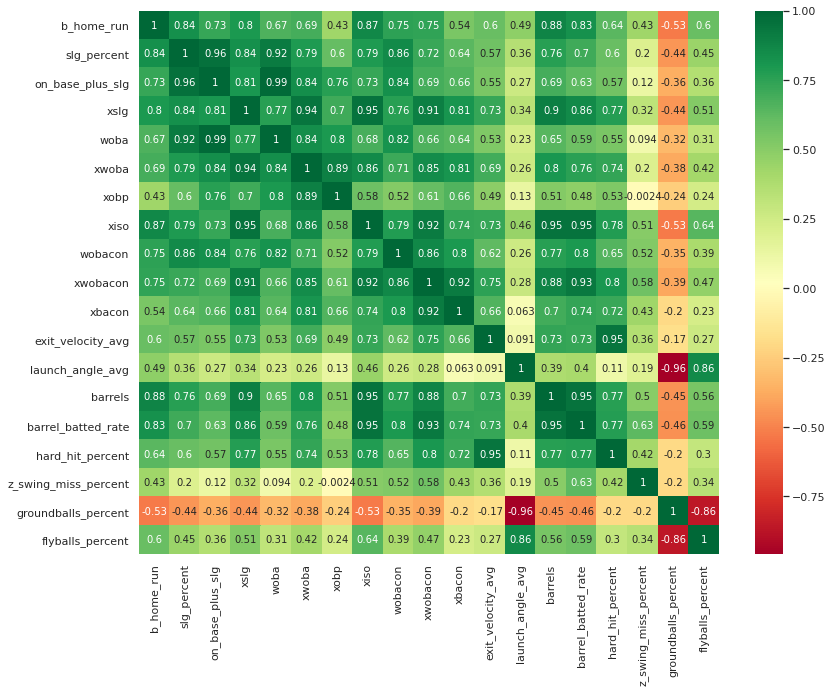

In [16]:
# heatmap

plt.figure(figsize=(13,10))
heatmap = sns.heatmap(df_old[corr_columns].corr(),annot=True,cmap="RdYlGn")

- 다중공산성이 매우 높아 문제를 일으킬 가능성 높음

#### VIF (Variance Inflation Factor) 사용
- 다른 독립변수에 의존하는(VIF가 높은) 변수 삭제

In [17]:
vif_old = df_old.drop(['groundballs_percent', 'oz_swing_miss_percent', 'z_swing_percent', 'z_swing_percent', 'batting_avg', 'slg_percent', 'on_base_percent', 'woba', 'wobacon', 'on_base_plus_slg', 'bacon'], axis=1)

In [18]:
# 지수표현 없애기 위한 옵션 설정
pd.options.display.float_format = '{:.5f}'.format

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [float(variance_inflation_factor(
    vif_old.values, i)) for i in range(vif_old.shape[1])]
vif["features"] = vif_old.columns
vif.sort_values('VIF Factor')
vif

,VIF Factor,features
0,52.13555,player_id
1,25137.87518,b_ab
2,26528.65923,b_total_pa
3,120.44973,b_home_run
4,288719.08996,xba
5,841730.52080,xslg
6,22778.52214,xwoba
7,16845.90620,xobp
8,153516.75636,xiso
9,17018.87765,xwobacon


In [20]:
# 확정
df_old = df_old.drop(['groundballs_percent', 'oz_swing_miss_percent', 'z_swing_percent', 'z_swing_percent', 'batting_avg', 'slg_percent', 'on_base_percent', 'woba', 'wobacon', 'on_base_plus_slg', 'bacon'], axis=1)

### 칼럼 하나씩 살펴보고 이상치 제거 / 제외할 칼럼 선정 (Outlier remove)

- 분석 대상 :
    -  'xba', 'xslg', 'xwoba', 'xobp', 'xiso',
       'xwobacon', 'xbacon', 'xbadiff', 'xslgdiff',
       'wobadif', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrels', 'barrel_batted_rate',
       'poorlyweak_percent', 'hard_hit_percent'
       'z_swing_miss_percent', 'oz_contact_percent',
       'flyballs_percent', 'linedrives_percent'

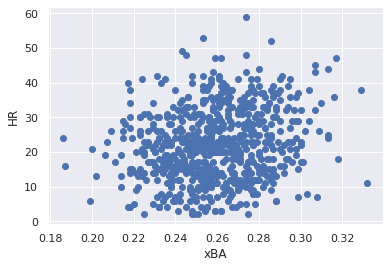

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xba'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xBA')
plt.show()

- 타율은 생각보다 홈런과 큰 관계없음

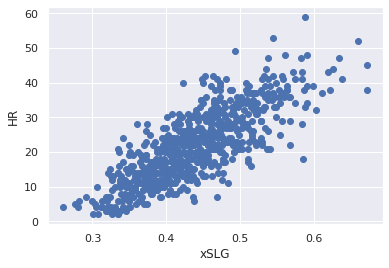

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xslg'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xSLG')
plt.show()

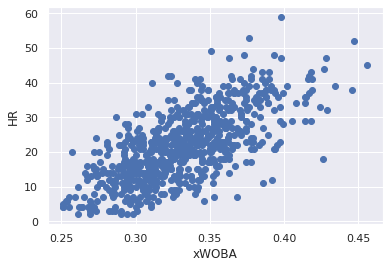

In [23]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xwoba'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xWOBA')
plt.show()

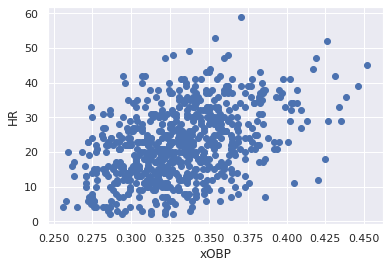

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xobp'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xOBP')
plt.show()

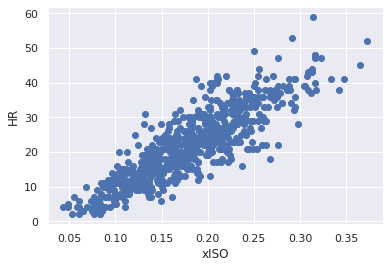

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xiso'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xISO')
plt.show()

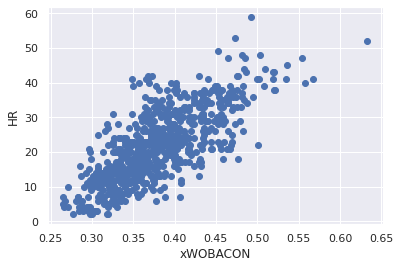

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xwobacon'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xWOBACON')
plt.show()

In [27]:
# 압도적인 xWOBACON의 2017년 아론저지... 학습에 영향을 줄수있으니 눈물머금고 제외한다...
df_old = df_old[df_old['xwobacon'] < 0.6]

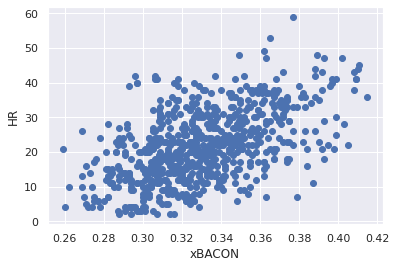

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xbacon'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xBACON')
plt.show()

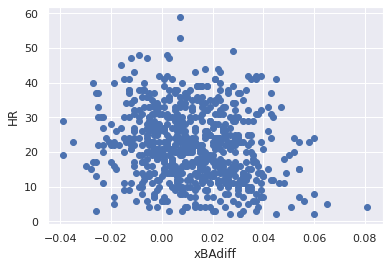

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xbadiff'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xBAdiff')
plt.show()

- 타율 관련된 칼럼 삭제 고민

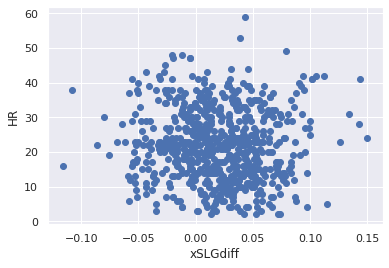

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['xslgdiff'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('xSLGdiff')
plt.show()

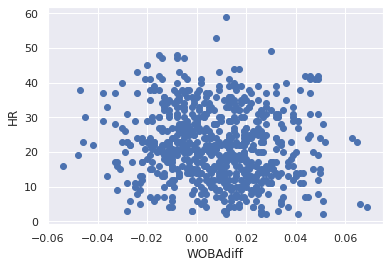

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['wobadif'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('WOBAdiff')
plt.show()

- (현재기록) - (기대기록) 지표는 홈런과 관계가 거의 없다

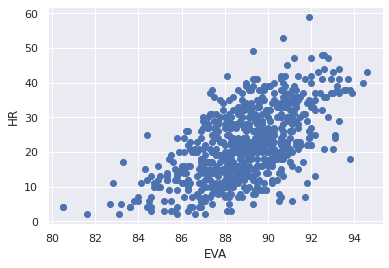

In [32]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['exit_velocity_avg'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('EVA')
plt.show()

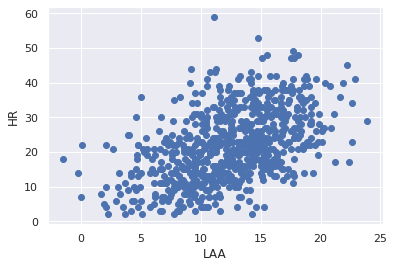

In [33]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['launch_angle_avg'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('LAA')
plt.show()

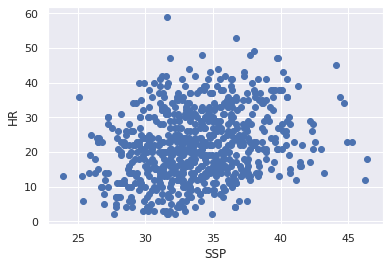

In [34]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['sweet_spot_percent'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('SSP')
plt.show()

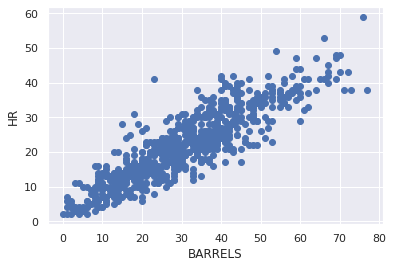

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['barrels'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('BARRELS')
plt.show()

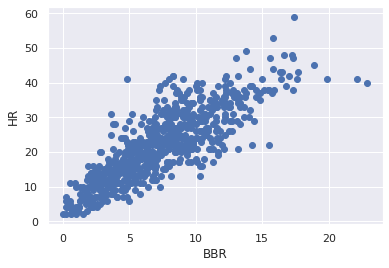

In [36]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['barrel_batted_rate'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('BBR')
plt.show()

- 20% 이상인 친구들 제외

In [37]:
df_old = df_old[df_old['barrel_batted_rate'] < 20]

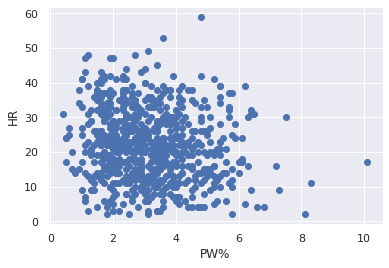

In [38]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['poorlyweak_percent'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('PW%')
plt.show()

- 반비례 관계일줄 알았는데 생각보다 관계없다

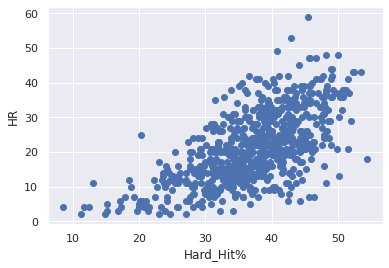

In [39]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['hard_hit_percent'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('Hard_Hit%')
plt.show()

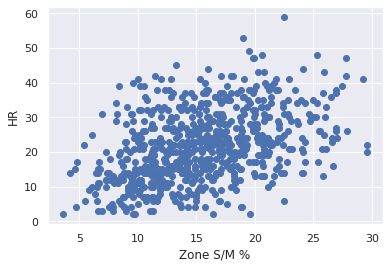

In [40]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['z_swing_miss_percent'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('Zone S/M %')
plt.show()

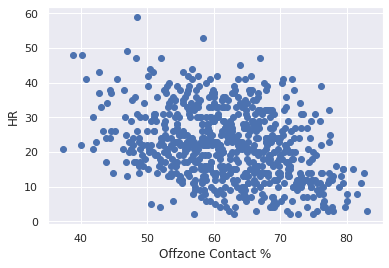

In [41]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['oz_contact_percent'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('Offzone Contact %')
plt.show()

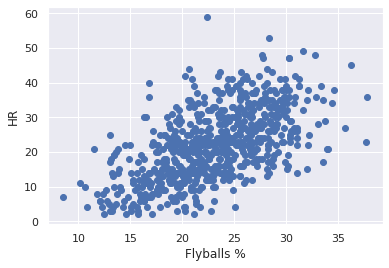

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['flyballs_percent'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('Flyballs %')
plt.show()

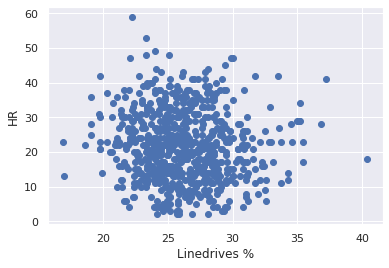

In [43]:
fig, ax = plt.subplots()
ax.scatter(x = df_old['linedrives_percent'], y = df_old['b_home_run'])
plt.ylabel('HR')
plt.xlabel('Linedrives %')
plt.show()

### 추가 제외할 칼럼 선정
- xba / xbadiff / xslgdiff / wobadif / sweet_spot_percent / poorlyweak_percent / linedirves_percent

In [44]:
df_old = df_old.drop(['xba', 'xbadiff', 'xslgdiff', 'wobadif', 'sweet_spot_percent', 'poorlyweak_percent', 'linedrives_percent'], axis=1)

In [45]:
df_old.head()

,player_id,b_ab,b_total_pa,b_home_run,xslg,xwoba,xobp,xiso,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,barrels,barrel_batted_rate,hard_hit_percent,z_swing_miss_percent,oz_contact_percent,flyballs_percent
142,116338,521,567,22,0.37000,0.29000,0.28500,0.14000,0.32500,0.28700,88.50000,10.80000,21,5.00000,35.30000,17.20000,63.70000,22.60000
143,120074,528,614,37,0.61100,0.41700,0.38500,0.31200,0.47000,0.36100,93.00000,15.70000,58,13.10000,49.50000,17.00000,65.40000,25.60000
144,121347,523,620,33,0.49100,0.36600,0.35400,0.24600,0.43200,0.33600,91.30000,12.20000,42,10.90000,44.20000,26.10000,53.10000,24.90000
145,133380,475,516,17,0.40000,0.30000,0.29000,0.16200,0.31800,0.27500,87.40000,15.80000,23,5.60000,35.00000,12.30000,70.90000,24.50000
146,134181,567,619,18,0.47700,0.35700,0.34300,0.18500,0.37600,0.33000,89.50000,12.60000,28,5.50000,40.80000,10.90000,74.80000,18.40000


In [46]:
df_old.columns

Index(['player_id', 'b_ab', 'b_total_pa', 'b_home_run', 'xslg', 'xwoba',
       'xobp', 'xiso', 'xwobacon', 'xbacon', 'exit_velocity_avg',
       'launch_angle_avg', 'barrels', 'barrel_batted_rate', 'hard_hit_percent',
       'z_swing_miss_percent', 'oz_contact_percent', 'flyballs_percent'],
      dtype='object')

#### test_data에도 똑같이 맞춰 삭제하기

In [47]:
df_now = df_now.drop(['groundballs_percent', 'oz_swing_miss_percent', 'z_swing_percent', 'z_swing_percent', 'batting_avg', 'slg_percent', 'on_base_percent', 'woba', 'wobacon', 'on_base_plus_slg', 'bacon', 'xba', 'xbadiff', 'xslgdiff', 'wobadif', 'sweet_spot_percent', 'poorlyweak_percent', 'linedrives_percent'], axis=1)
df_now.columns

Index(['player_id', 'b_ab', 'b_total_pa', 'b_home_run', 'b_game', 'xslg',
       'xwoba', 'xobp', 'xiso', 'xwobacon', 'xbacon', 'exit_velocity_avg',
       'launch_angle_avg', 'barrels', 'barrel_batted_rate', 'hard_hit_percent',
       'z_swing_miss_percent', 'oz_contact_percent', 'flyballs_percent'],
      dtype='object')

In [48]:
# test_data의 정답데이터 분리
answer = df_now['b_home_run']
df_now = df_now.drop(['b_home_run'], axis=1)

In [49]:
print(df_old.shape)
print(df_now.shape)

(705, 18)
(137, 18)


#### 현재 데이터에 부족한 게임 수 조정하기

In [50]:
df_now['progress'] = df_now['b_game'] / 168
df_now['progress']

0     0.42857
1     0.49405
2     0.52976
3     0.51190
4     0.51190
        ...  
132   0.54167
133   0.46429
134   0.54762
135   0.52976
136   0.47024
Name: progress, Length: 137, dtype: float64

In [51]:
df_now['progress'] = df_now['progress'] + 1
df_now['progress']

0     1.42857
1     1.49405
2     1.52976
3     1.51190
4     1.51190
        ...  
132   1.54167
133   1.46429
134   1.54762
135   1.52976
136   1.47024
Name: progress, Length: 137, dtype: float64

In [52]:
df_now['b_ab'] = round(df_now['b_ab'] * df_now['progress'], 0)
df_now['b_total_pa'] = round(df_now['b_total_pa'] * df_now['progress'], 0)
df_now['barrels'] = round(df_now['barrels'] * df_now['progress'], 0)
df_now.head()

,player_id,b_ab,b_total_pa,b_game,xslg,xwoba,xobp,xiso,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,barrels,barrel_batted_rate,hard_hit_percent,z_swing_miss_percent,oz_contact_percent,flyballs_percent,progress
0,408234,383.00000,417.00000,72,0.37000,0.28600,0.27800,0.15100,0.35100,0.30500,90.80000,10.20000,20.00000,7.20000,48.50000,20.90000,58.20000,24.20000,1.42857
1,443558,430.00000,502.00000,83,0.53900,0.39200,0.36900,0.25700,0.44700,0.35800,93.40000,10.40000,49.00000,14.00000,54.00000,21.10000,53.80000,26.00000,1.49405
2,444482,476.00000,528.00000,89,0.35200,0.29800,0.31700,0.11000,0.31000,0.29100,89.20000,4.80000,23.00000,5.80000,41.10000,13.70000,58.40000,14.70000,1.52976
3,453568,440.00000,508.00000,86,0.41900,0.35400,0.37600,0.13500,0.35700,0.33300,87.50000,7.70000,21.00000,5.60000,40.90000,13.10000,68.10000,22.20000,1.51190
4,457705,435.00000,534.00000,86,0.44500,0.36000,0.37000,0.19800,0.40200,0.33500,88.40000,12.10000,32.00000,9.70000,38.20000,19.40000,51.50000,28.10000,1.51190


In [53]:
import numpy as np

# b_game(게임 수), progress(진행률) 칼럼 삭제
df_now = df_now.drop(['b_game', 'progress'], axis=1)

# old data에서 로그변환한 홈런 칼럼 따로 저장하고 삭제
y_data = np.log1p(df_old['b_home_run'])
df_old = df_old.drop(['b_home_run'], axis=1)

# shape 비교
print(df_old.columns, df_old.shape)
print(df_now.columns, df_now.shape)

Index(['player_id', 'b_ab', 'b_total_pa', 'xslg', 'xwoba', 'xobp', 'xiso',
       'xwobacon', 'xbacon', 'exit_velocity_avg', 'launch_angle_avg',
       'barrels', 'barrel_batted_rate', 'hard_hit_percent',
       'z_swing_miss_percent', 'oz_contact_percent', 'flyballs_percent'],
      dtype='object') (705, 17)
Index(['player_id', 'b_ab', 'b_total_pa', 'xslg', 'xwoba', 'xobp', 'xiso',
       'xwobacon', 'xbacon', 'exit_velocity_avg', 'launch_angle_avg',
       'barrels', 'barrel_batted_rate', 'hard_hit_percent',
       'z_swing_miss_percent', 'oz_contact_percent', 'flyballs_percent'],
      dtype='object') (137, 17)


### 데이터 합치기 (concat)
- 데이터 한번에 handling 하기 위해 concat

In [54]:
df = pd.concat((df_old, df_now))
df.head()

,player_id,b_ab,b_total_pa,xslg,xwoba,xobp,xiso,xwobacon,xbacon,exit_velocity_avg,launch_angle_avg,barrels,barrel_batted_rate,hard_hit_percent,z_swing_miss_percent,oz_contact_percent,flyballs_percent
142,116338,521.00000,567.00000,0.37000,0.29000,0.28500,0.14000,0.32500,0.28700,88.50000,10.80000,21.00000,5.00000,35.30000,17.20000,63.70000,22.60000
143,120074,528.00000,614.00000,0.61100,0.41700,0.38500,0.31200,0.47000,0.36100,93.00000,15.70000,58.00000,13.10000,49.50000,17.00000,65.40000,25.60000
144,121347,523.00000,620.00000,0.49100,0.36600,0.35400,0.24600,0.43200,0.33600,91.30000,12.20000,42.00000,10.90000,44.20000,26.10000,53.10000,24.90000
145,133380,475.00000,516.00000,0.40000,0.30000,0.29000,0.16200,0.31800,0.27500,87.40000,15.80000,23.00000,5.60000,35.00000,12.30000,70.90000,24.50000
146,134181,567.00000,619.00000,0.47700,0.35700,0.34300,0.18500,0.37600,0.33000,89.50000,12.60000,28.00000,5.50000,40.80000,10.90000,74.80000,18.40000


In [55]:
df.shape

(842, 17)

### 결측치 확인

In [56]:
null = (df.isna().sum() / len(df) * 100)
null

player_id              0.00000
b_ab                   0.00000
b_total_pa             0.00000
xslg                   0.00000
xwoba                  0.00000
xobp                   0.00000
xiso                   0.00000
xwobacon               0.00000
xbacon                 0.00000
exit_velocity_avg      0.00000
launch_angle_avg       0.00000
barrels                0.00000
barrel_batted_rate     0.00000
hard_hit_percent       0.00000
z_swing_miss_percent   0.00000
oz_contact_percent     0.00000
flyballs_percent       0.00000
dtype: float64

### 왜도 확인 및 box-cox 변환

In [57]:
from scipy.stats import skew 

skewness = df.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [58]:
high_skewness = skewness[abs(skewness) > 1] # 왜도 값이 1 이상인 칼럼만 채택
skew_feats = high_skewness.index
print(high_skewness)
print(skew_feats)

player_id   -1.26594
dtype: float64
Index(['player_id'], dtype='object')


### 학습과정에서 필요없는 column drop

In [59]:
x_train = df_old.drop(['player_id'], axis=1)
x_test = df_now.drop(['player_id'], axis=1)

## 학습모델링

In [60]:
# 사용할 모델 import
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

### RobustScaler
- 중앙값과 IQR 사용하여 아웃라이어의 영향 최소화

In [61]:
from sklearn.preprocessing import RobustScaler

rbst_scaler=RobustScaler()
X_rbst=rbst_scaler.fit_transform(x_train)
test_rbst=rbst_scaler.transform(x_test)

### KFold 검정

In [62]:
kfold = KFold(n_splits=4)

random_state = 1
reg = []

reg.append(Lasso(random_state = random_state))
reg.append(ElasticNet(random_state = random_state))
reg.append(RandomForestRegressor(random_state=random_state))
reg.append(GradientBoostingRegressor(random_state=random_state))
reg.append(XGBRegressor(silent=True,random_state=random_state))
reg.append(LGBMRegressor(verbose_eval=False,random_state = random_state))

# print(reg)

reg_results = []

for regre in reg :
    reg_results.append(np.mean(np.sqrt(-cross_val_score(regre, X_rbst, y = y_data ,scoring = 'neg_mean_squared_error',
                                       cv = kfold, n_jobs=-4))))

In [63]:
reg_means = []
reg_std = []
for reg_result in reg_results:
    reg_means.append(reg_result.mean())
    reg_std.append(reg_result.std())

In [64]:
# 위에서부터 Lasso, ElasticNet, RandomForest, GradientBoosting, XGBoost, LGBM에 대한 교차검증결과
# 평균이 낮을수록 좋음

reg_re = pd.DataFrame({"CrossValMeans":reg_means,"CrossValerrors": reg_std})
reg_re

,CrossValMeans,CrossValerrors
0,0.54101,0.00000
1,0.54101,0.00000
2,0.24434,0.00000
3,0.24773,0.00000
4,0.26819,0.00000
5,0.24913,0.00000


- CrossValMeans 확인 : GradeintBoosting, RandomForest, LightGBM 모델에 대해 파라미터 튜닝 결정

In [65]:
# Gradient boosting 파라미터 튜닝
GBC = GradientBoostingRegressor()
gb_param_grid = {'n_estimators' : [30,50,100],
              'learning_rate': [0.1, 0.01, 0.2],
              'max_depth': [3, 4, 5],
              'min_samples_leaf': [20,30,40],
              'max_features': [0.3, 0.2, 0.15] 
              }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsGBC.fit(X_rbst,y_data)
GBC_best = gsGBC.best_estimator_

# 최고 점수
gsGBC.best_score_

Fitting 4 folds for each of 243 candidates, totalling 972 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 116 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 972 out of 972 | elapsed:    6.3s finished


-0.05511307365541894

In [66]:
print(gsGBC.best_estimator_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=20, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [67]:
# RandomForest 파라미터 튜닝
RF = RandomForestRegressor()
rf_param_grid = {'n_estimators' : [10, 20, 30],
              'max_depth': [6, 8, 10, 12, 15],
              'min_samples_leaf': [5, 10, 20, 30],
              'max_features': [0.4, 0.6, 0.8, 1] 
              }
gsRF = GridSearchCV(RF,param_grid = rf_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsRF.fit(X_rbst,y_data)
RF_best = gsRF.best_estimator_

# 최고 점수
gsRF.best_score_

Fitting 4 folds for each of 240 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:    5.4s finished


-0.05474415311434598

In [68]:
print(gsRF.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=0.4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [69]:
#LGBMClassifier 파라미터 튜닝
LGB = LGBMRegressor()
lgb_param_grid = {
    'n_estimators' : [30, 50, 70],
    'learning_rate': [0.1],
    'max_depth': [5, 10, 15],
    'num_leaves': [10, 30, 50],
    'min_split_gain': [0.1, 0.2, 0.3],
}
gsLGB = GridSearchCV(LGB,param_grid = lgb_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
gsLGB.fit(X_rbst,y_data)
LGB_best = gsLGB.best_estimator_

# 최고 점수
gsLGB.best_score_

Fitting 4 folds for each of 81 candidates, totalling 324 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 116 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 324 out of 324 | elapsed:    1.0s finished


-0.05724827980153845

In [70]:
print(gsLGB.best_estimator_)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=10,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=50, n_jobs=-1, num_leaves=10, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## 예측
- 앙상블

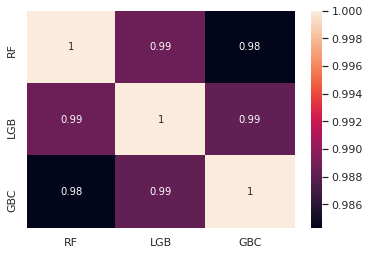

In [71]:
test_Survived_GBC = pd.Series(GBC_best.predict(test_rbst), name="GBC")
test_Survived_RF = pd.Series(RF_best.predict(test_rbst), name="RF")
test_Survived_LGB = pd.Series(LGB_best.predict(test_rbst), name="LGB")

ensemble_results = pd.concat([test_Survived_RF,test_Survived_LGB,
                              test_Survived_GBC],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [77]:
ensemble = np.expm1(0.1*test_Survived_GBC + 0.8*test_Survived_RF + 0.1*test_Survived_LGB)
prediction = pd.DataFrame({
    "player_id" :player_id,
    "name" : name,
    "HR": ensemble
})
prediction.head()

,player_id,name,HR
0,408234,Cabrera Miguel,15.26545
1,443558,Cruz Jr. Nelson,29.69263
2,444482,Peralta David,12.15067
3,453568,Blackmon Charlie,13.97717
4,457705,McCutchen Andrew,22.29783


In [83]:
prediction.to_csv('ensemble.csv')

- 보팅 (Voting)

In [79]:
from sklearn.ensemble import VotingRegressor

votingC = VotingRegressor(estimators=[('RF', RF_best), ('LGB', LGB_best), ('GBC',GBC_best)], n_jobs=4)
votingC = votingC.fit(X_rbst, y_data)  

In [80]:
test_HR = pd.Series(votingC.predict(test_rbst), name="HR")

In [81]:
predict_voting = pd.DataFrame({
    "player_id" :player_id,
    "name" : name,
    "HR": np.expm1(test_HR)
})
predict_voting.head()

,player_id,name,HR
0,408234,Cabrera Miguel,15.03031
1,443558,Cruz Jr. Nelson,28.22319
2,444482,Peralta David,12.51823
3,453568,Blackmon Charlie,12.97242
4,457705,McCutchen Andrew,21.77031


In [84]:
predict_voting.to_csv('voting.csv')

- 스태킹(stacking)

In [87]:
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.utils.testing import ignore_warnings

/home/minding/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [88]:
params = {'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'use_features_in_secondary' : [True, False]}

In [89]:
clf1 = RF_best
clf2 = LGB_best
clf3 = GBC_best

lr = LogisticRegression()
st_re= StackingRegressor(regressors=[clf1, clf2, clf3], meta_regressor=RandomForestRegressor())
st_mod = st_re.fit(X_rbst, y_data)
st_pred = st_mod.predict(test_rbst)

In [90]:
predict_stacking = pd.DataFrame({
    "player_id" :player_id,
    "name" : name,
    "HR": np.expm1(st_pred)
})
predict_stacking.head()

,player_id,name,HR
0,408234,Cabrera Miguel,17.37124
1,443558,Cruz Jr. Nelson,28.33614
2,444482,Peralta David,10.33489
3,453568,Blackmon Charlie,12.54181
4,457705,McCutchen Andrew,23.47967


In [91]:
predict_stacking.to_csv('stacking.csv')

In [92]:
hr_21 = pd.read_csv('0727hr.csv')
hr_21.head()

,last_name,first_name,player_id,year,b_home_run,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,sweet_spot_percent,barrel_batted_rate,Unnamed: 14
0,Cabrera,Miguel,408234,2021,7,0.22100,0.37500,0.29000,0.28100,0.15400,91.10000,10.60000,31.60000,7.20000,NaN
1,Cruz Jr.,Nelson,443558,2021,21,0.28000,0.53400,0.38800,0.36700,0.25400,93.60000,10.90000,32.10000,14.50000,NaN
2,Peralta,David,444482,2021,4,0.24000,0.34700,0.29600,0.31600,0.10600,89.20000,4.50000,27.00000,5.60000,NaN
3,Blackmon,Charlie,453568,2021,6,0.28800,0.42700,0.35600,0.37600,0.13800,87.60000,8.70000,29.90000,5.50000,NaN
4,McCutchen,Andrew,457705,2021,17,0.24700,0.44100,0.35800,0.36800,0.19400,88.40000,12.90000,37.00000,9.60000,NaN


In [96]:
hr = hr_21.iloc[:,2:5]
hr

,player_id,year,b_home_run
0,408234,2021,7
1,443558,2021,21
2,444482,2021,4
3,453568,2021,6
4,457705,2021,17
...,...,...,...
135,668942,2021,10
136,669221,2021,12
137,669242,2021,6
138,669256,2021,9


In [99]:
ensemble = pd.merge(prediction, hr)
ensemble.to_csv('ensemble.csv')

,player_id,name,HR,year,b_home_run
0,408234,Cabrera Miguel,15.26545,2021,7
1,443558,Cruz Jr. Nelson,29.69263,2021,21
2,444482,Peralta David,12.15067,2021,4
3,453568,Blackmon Charlie,13.97717,2021,6
4,457705,McCutchen Andrew,22.29783,2021,17
...,...,...,...,...,...
129,668942,Rojas Josh,15.51926,2021,10
130,669221,Murphy Sean,24.25504,2021,12
131,669242,Edman Tommy,12.56530,2021,6
132,669256,Solak Nick,16.82050,2021,9


In [100]:
voting = pd.merge(predict_voting, hr)
voting.to_csv('ensemble.csv')

In [101]:
stacking = pd.merge(predict_stacking, hr)
stacking.to_csv('stacking.csv')